<a href="https://colab.research.google.com/github/GuoyaoShen/DiatomDL/blob/main/spectra_search_v_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Drive

In [3]:
#@title
from google.colab import drive
drive.mount('/content/drive')




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re 

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
from torchvision import datasets, transforms

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pseudo Data Prepare

## Model Construct

In [22]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

class SquareLayer(nn.Module):
    '''
    This layer works as a function of: y = xAx+(Bx)+C
    '''
    def __init__(self, dim_in, dim_out):
        super(SquareLayer, self).__init__()
        self.linear = nn.Linear(dim_in, dim_out, bias=False)
        self.bilinear = nn.Bilinear(dim_in, dim_in, dim_out)

    def forward(self, x):
        out = self.linear(x) + self.bilinear(x,x)
        return  out


class NetDense(nn.Module):
    def __init__(self, dim_in, dim_out):
        super(NetDense, self).__init__()
        self.dim_out = dim_out

        self.tksz1d1 = 100
        self.dim_mid1 = 1000  # dimension in the middle before conv layer

        self.tksz1d2 = 50
        self.dim_mid2 = 1000

        self.tksz1d3 = 100
        self.dim_mid3 = 2000

        self.ksz_smooth = 5  # kernel size used for smooth

        self.fc = nn.Sequential(

        nn.Linear(dim_in, 100),
        nn.ReLU(True),
        nn.Linear(100, 500),
        nn.ReLU(True),
        nn.Linear(500, 1000),
        nn.ReLU(True),
        nn.Linear(1000, 2000),
        nn.ReLU(True),
        nn.Linear(2000, 4000),
        nn.ReLU(True),
        nn.Linear(4000, self.dim_mid1-self.tksz1d1+1),
        # nn.Linear(4000, 2*self.dim_out),



        # # SquareLayer(dim_in, 100),
        # nn.Linear(dim_in, 100),
        # nn.ReLU(True),
        # nn.Linear(100, 500),
        # nn.ReLU(True),
        # nn.Linear(500, 1000),
        # nn.ReLU(True),
        # # nn.Linear(1000, 2000),
        # # nn.ReLU(True),
        # # nn.Linear(2000, 4000),
        # # nn.ReLU(True),
        # nn.Linear(1000, self.dim_mid1-self.tksz1d1+1),
        # nn.ReLU(True),
        )

        self.convt1 = nn.Sequential(
            nn.ConvTranspose1d(1, 2, kernel_size=self.tksz1d1, stride=1),
            nn.BatchNorm1d(2)
        )
        # self.convt2 = nn.ConvTranspose1d(2, 2, kernel_size=self.tksz1d2, stride=1)
        # self.convt3 = nn.ConvTranspose1d(2, 2, kernel_size=self.tksz1d3, stride=1)
        # self.conv = nn.Conv1d(2, 2, kernel_size=self.ksz_smooth, stride=1)

        self.fc_sampling1 = nn.Sequential(
        # nn.Linear(self.dim_mid1, 1000),
        # nn.ReLU(True),
        # nn.Linear(1000, 2000),
        # nn.ReLU(True),
        # nn.Linear(2000, 1500),
        # nn.ReLU(True),
        # nn.Linear(1500, self.dim_out),

        nn.Linear(self.dim_mid1, 2000),
        nn.ReLU(True),
        nn.Linear(2000, 1500),
        nn.ReLU(True),
        # nn.Linear(2000, 1500),
        # nn.ReLU(True),
        nn.Linear(1500, self.dim_out),





        # # nn.ReLU(True),
        # nn.Linear(self.dim_mid1, 1000),
        # # nn.Linear(2*self.dim_mid1, 1000),
        # nn.ReLU(True),
        # nn.Linear(1000, 2000),
        # nn.ReLU(True),
        # nn.Linear(2000, 4000),
        # nn.ReLU(True),
        # # nn.Linear(1000, self.dim_mid2-self.tksz1d2+1),
        # # nn.Linear(4000, 2*self.dim_out),
        # nn.Linear(4000, self.dim_out),
        # # nn.Linear(1000, dim_out+self.ksz_smooth-1),
        # # nn.ReLU(True),
        )

        # self.fc_sampling2 = nn.Sequential(
        # # nn.ReLU(True),
        # nn.Linear(self.dim_mid2, 1000),
        # nn.ReLU(True),
        # nn.Linear(1000, 1500),
        # nn.ReLU(True),
        # # nn.Linear(1500, self.dim_mid3-self.tksz1d3+1),
        # nn.Linear(1500, dim_out),
        # # nn.ReLU(True),
        # )

        # self.fc_sampling3 = nn.Sequential(
        # nn.ReLU(True),
        # nn.Linear(self.dim_mid3, 2000),
        # nn.ReLU(True),
        # nn.Linear(2000, 1500),
        # nn.ReLU(True),
        # nn.Linear(1500, dim_out),
        # )

        # self.fc_smooth = nn.Sequential(
        # # nn.ReLU(True),
        # nn.Linear(dim_out, 1500),
        # nn.ReLU(True),
        # nn.Linear(1500, dim_out),
        # )

    

    def forward(self, x):
        out = self.fc(x)
        # print(out.shape[0])
        # out = out.view(out.shape[0], 2, self.dim_out)
        # out = out.view(out.shape[0], 1, out.shape[1])
        out = out.view(out.shape[0], 1, -1)
        # print(out.shape)
        out = self.convt1(out)
        # print(out.shape)
        # out = out.view(out.shape[0], 2*self.dim_mid1)
        # print(out.shape)
        # out = out.view(out.shape[0], out.shape[2])
        # print(out.shape)
        out = self.fc_sampling1(out)
        # print(out.shape)
        # out = out.view(out.shape[0], 2, -1)

        # out = self.convt2(out)
        # out = self.fc_sampling2(out)

        # out = self.convt3(out)
        # out = self.fc_sampling3(out)

        # out = self.conv(out)
        # out = self.fc_smooth(out)

        return out



class SpectraMSELoss(nn.Module):
    def __init__(self, use_target_weight=False):
        super(SpectraMSELoss, self).__init__()
        self.criterion = nn.MSELoss(reduction='mean')
        self.use_target_weight = use_target_weight

    def forward(self, output, target, target_weight):
        # batch_size = output.size(0)
        # num_joints = output.size(1)
        # heatmaps_pred = output.reshape((batch_size, num_joints, -1)).split(1, 1)  # Split along dim1, num_joints
        # heatmaps_gt = target.reshape((batch_size, num_joints, -1)).split(1, 1)
        # loss = 0

        # for idx in range(num_joints):
        #     heatmap_pred = heatmaps_pred[idx].squeeze()  #(N,H*W)
        #     heatmap_gt = heatmaps_gt[idx].squeeze()
        #     if self.use_target_weight:
        #         loss += 0.5 * self.criterion(
        #             heatmap_pred.mul(target_weight[:, idx]),
        #             heatmap_gt.mul(target_weight[:, idx])
        #         )
        #     else:
        #         loss += 0.5 * self.criterion(heatmap_pred, heatmap_gt)

        # return loss / num_joints

        batch_size = output.size(0)
        num_spectra = output.size(1)
        loss = 0
        for idx in range(num_spectra):
            spectra_pred = output[:,idx,:]
            spectra_true = target[:,idx,:]
            if self.use_target_weight:
                loss += self.criterion(spectra_pred, spectra_true)*target_weight[idx]
            else:
                loss += self.criterion(spectra_pred, spectra_true)

        return loss / num_spectra

## Load Trained Model

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re 

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
from torchvision import datasets, transforms

In [24]:
PATH_MODEL = '/content/drive/My Drive/BU Class/Research/BioDL_Project/model/densetransnet10_forward_RT_E2000.pt'

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net_dense = torch.load(PATH_MODEL)
net_dense = net_dense.to(device)
net_dense.eval()

print('MODEL LOADED')
print(device)

MODEL LOADED
cuda:0


## Predict Spectra from Params

In [27]:
# X = torch.Tensor(np.array([[add_spa, d, fillet, p, phi, px, py, t_ground, t_pattern, t_spacer, theta]])).to(device)
# X = torch.Tensor(np.array([[d, p, px, py, t_ground, t_pattern, t_spacer]])).to(device)

# fixed param initiate
add_spa=0.5
# d=0.04
fillet=0
# p=0.17
phi=0
px=0.7794
py=0.45
t_ground=0.1
# t_pattern=0.03
t_spacer=0.02
theta=0


# get params combination (loop) (t,p,d)
# t_downlimit = 0.01
# t_uplimit = 0.09
# t_step = 0.005
t_downlimit = 1
t_uplimit = 9
t_step = 0.5
t_scale = 0.01
t = t_downlimit

# p_downlimit = 0.02
# p_uplimit = 0.17
# p_step = 0.005
p_downlimit = 2
p_uplimit = 17
p_step = 0.5
p_scale = 0.01
p = p_downlimit

# d_downlimit = 0.01
# d_uplimit = 0.16
# d_step = 0.005
d_downlimit = 1
d_uplimit = 16
d_step = 0.5
d_scale = 0.01
d = d_downlimit

idx_data = 0
params = np.empty((0,7))
while t <= t_uplimit:
    while p<=p_uplimit:
        while p-d>=1:
            # print(d*d_scale,'||',p*p_scale,'||',t*t_scale)
            d_param = d*d_scale
            p_param = p*p_scale
            t_pattern_param = t*t_scale
            ele_params = np.array([[d_param, p_param, px, py, t_ground, t_pattern_param, t_spacer]])
            params = np.concatenate((params, ele_params), axis=0)
            idx_data += 1
            d += d_step
        # refresh d
        d = d_downlimit
        # step p
        p += p_step
    # refresh p, d
    p = p_downlimit
    d = d_downlimit
    # step t
    t += t_step
print('data length',idx_data)
print(params.shape)
# print(params)


# params as torch tensor
X = torch.Tensor(params).to(device)


# input to model and get spectra
y_pred = net_dense(X)
y_pred_np = y_pred.cpu().detach().numpy()
print(y_pred_np.shape)
spectra_R = y_pred_np[:,0,:]
spectra_T = y_pred_np[:,1,:]
print(spectra_R.shape)


# save as pseudo-data for searching
path_pseudo_dataset = '/content/drive/My Drive/BU Class/Research/BioDL_Project/pseudo data/diatom_8432.npz'

np.savez(path_pseudo_dataset, param=params, R=spectra_R, T=spectra_T)

print('DATASET SAVED')

data length 8432
(8432, 7)
(8432, 2, 1001)
(8432, 1001)
DATASET SAVED


# Spectra Search from Pseudo Data

## Load Pseudo Dataset

In [4]:
path_pseudo_dataset = '/content/drive/My Drive/BU Class/Research/BioDL_Project/pseudo data/diatom_8432.npz'
data = np.load(path_pseudo_dataset)
print(data['param'].shape)
print(data['R'].shape)
print(data['T'].shape)

(8432, 7)
(8432, 1001)
(8432, 1001)


## Search

### Set Target Data

In [5]:
# set target data
# tg_freq = np.array([375, 375.75])
# tg_idx_freq = ((tg_freq-375)//0.375).astype(int)

tg_idx_freq = np.array([400, 800])  # debug use
print(tg_idx_freq)

tg_value = np.array([0.45, 0.24])

[400 800]


### Perform Distance Search

In [6]:
spectra_R = data['R'][:,tg_idx_freq]
print(spectra_R.shape)

(8432, 2)


In [13]:
dist_R = np.linalg.norm(spectra_R-tg_value, ord=2, axis=1)
print(dist_R.shape)
print(dist_R)
print(min(dist_R))

idx_sorted = np.argsort(dist_R)
print(idx_sorted)

(8432,)
[0.55013413 0.55063953 0.54699424 ... 0.32488521 0.37568453 0.43333537]
0.008386631847481032
[3591 2684 2730 ...   78   55   66]


In [16]:
idx_pick = idx_sorted[0:5]  # pick fisrt several idx
print(idx_pick)

[3591 2684 2730 2752 2409]


In [37]:
dist_pick = dist_R[idx_pick,...]  # distance
param_pick = data['param'][idx_pick,...]  # picked param
R_pick = data['R'][idx_pick,...][:,np.newaxis,:]
T_pick = data['T'][idx_pick,...][:,np.newaxis,:]
RT_pick = np.concatenate((R_pick,T_pick), axis=1)
print(dist_pick.shape)
print(param_pick.shape)
print(R_pick.shape)
print(T_pick.shape)
print(RT_pick.shape)

(5,)
(5, 7)
(5, 1, 1001)
(5, 1, 1001)
(5, 2, 1001)


### Visualize Picked Spectra

param: [0.08   0.09   0.7794 0.45   0.1    0.045  0.02  ]
distance: 0.008386631847481032
----
param: [0.08   0.115  0.7794 0.45   0.1    0.035  0.02  ]
distance: 0.008709600400117251
----
param: [0.105  0.125  0.7794 0.45   0.1    0.035  0.02  ]
distance: 0.009380800182542047
----
param: [0.105  0.13   0.7794 0.45   0.1    0.035  0.02  ]
distance: 0.009890730810089747
----
param: [0.105  0.16   0.7794 0.45   0.1    0.03   0.02  ]
distance: 0.010790351794191567
----


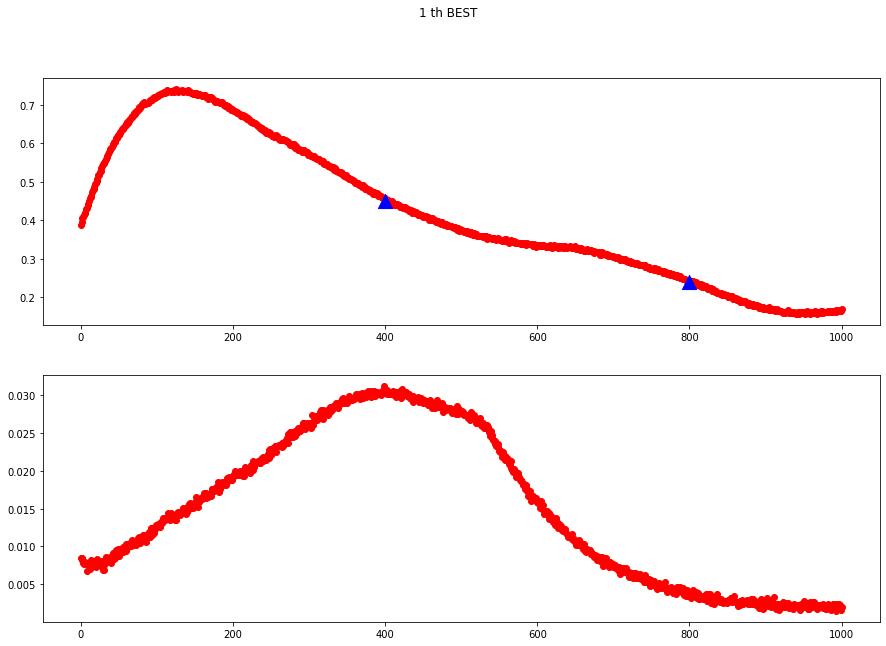

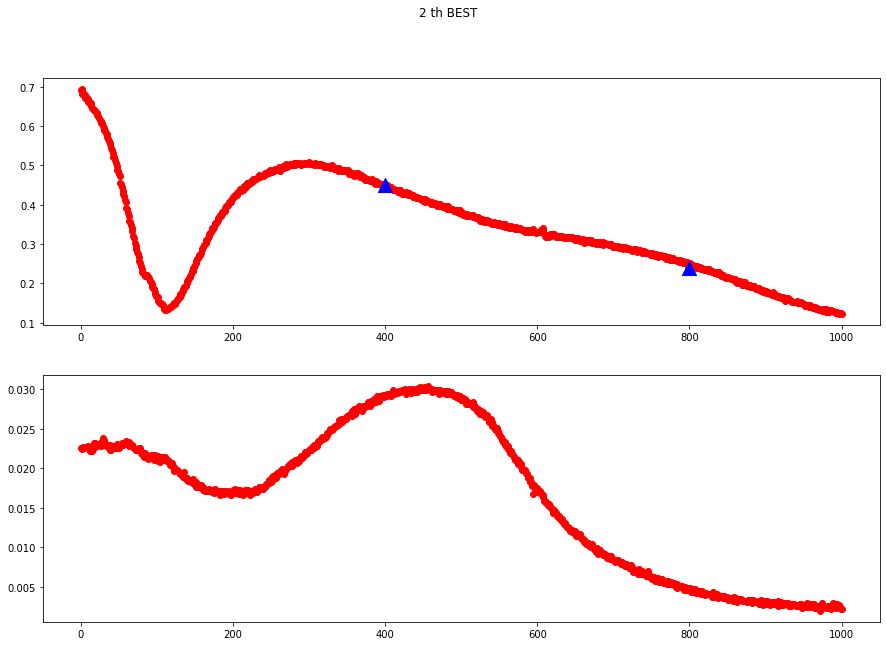

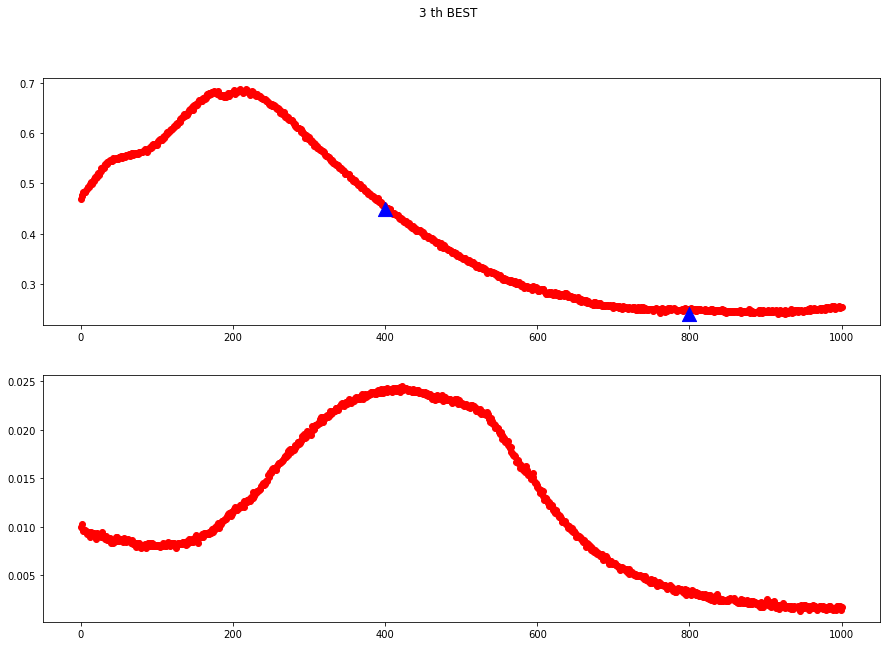

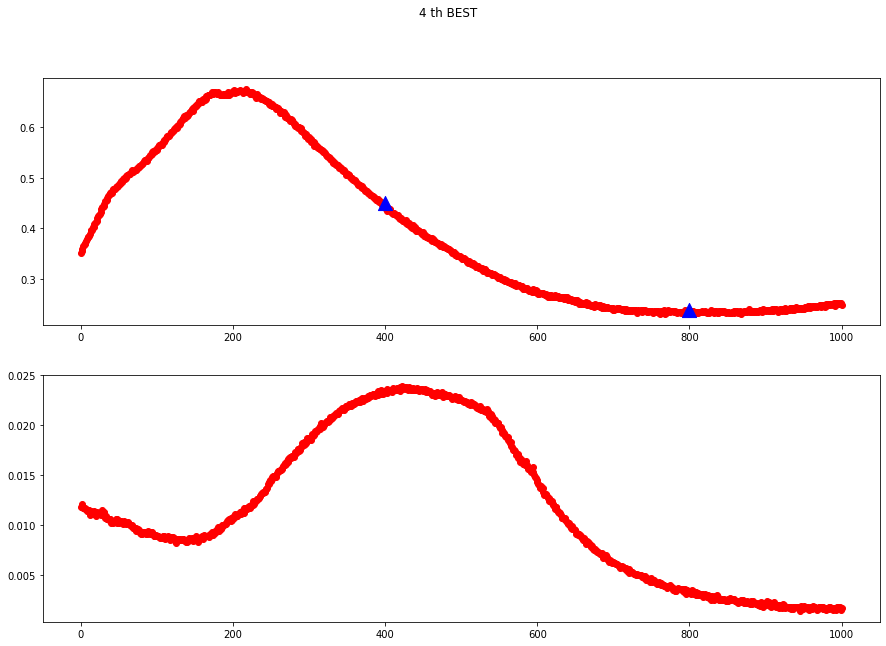

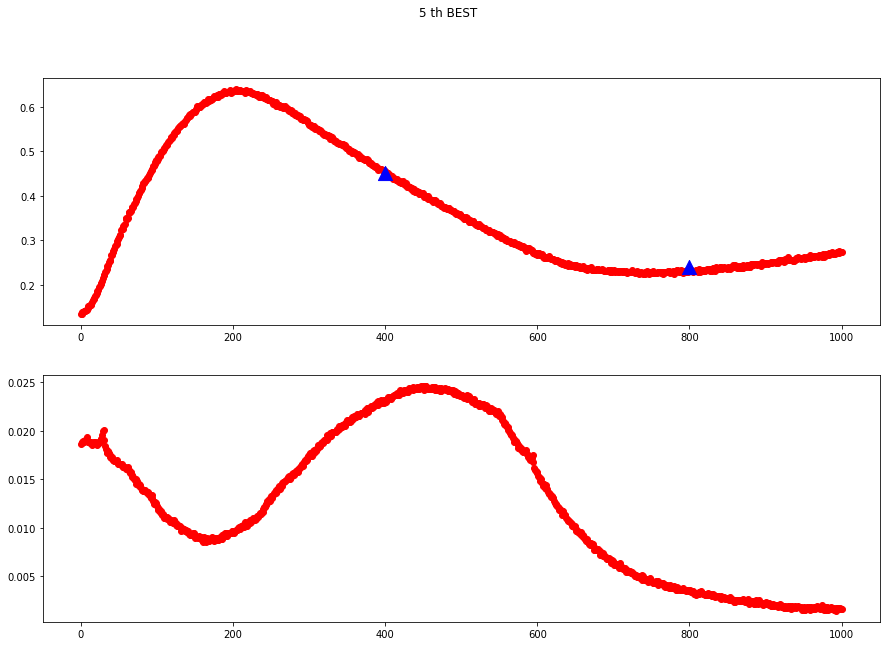

In [46]:
for idx_fig in range(param_pick.shape[0]):
    # if idx_fig != 0:  # debug use
    #     continue;

    # get params
    print('param:',param_pick[idx_fig])
    print('distance:',dist_pick[idx_fig])
    print('----')
    # plot spectra
    plt.figure(idx_fig+1, figsize=(15,10))
    plt.title(idx_fig+1)
    for idx_subfig in range(2):
        plt.suptitle(str(idx_fig+1)+' th BEST')
        plt.subplot(2, 1, idx_subfig+1)
        plt.scatter(np.arange(RT_pick.shape[2]), RT_pick[idx_fig,idx_subfig,:], c='r')
        if idx_subfig==0:
            plt.scatter(tg_idx_freq, tg_value, c='b', marker='^', s=200)

In [ ]:
|plt.figure(2, figsize=(21,12))
plt.title('T')
for idx_fig in range(9):
    plt.subplot(3, 3, idx_fig+1)
    plt.scatter(np.arange(y_test_np.shape[2]), y_test_np[idx_fig,1,:], c='r')
    plt.scatter(np.arange(y_test_pred_np.shape[2]), y_test_pred_np[idx_fig,1,:], c='b')
    plt.legend(('true', 'prediction'))
    plt.title('sample idx: '+str(idx_test[idx_fig]))